In [79]:
# Load Credit Card Data into Dataframe
import pandas as pd
from scipy.io import arff

data_file="german_credit.arff"
data=arff.loadarff(data_file)

raw_data=pd.DataFrame(data[0])
for col in raw_data.columns:
    if raw_data[col].dtype=='object':
        #making sure data is not read as bytes but as string values from a file
        raw_data[col] = raw_data[col].str.decode('utf-8')

In [80]:
print(raw_data.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [96]:
# Create table of data types
# Set header row as column
attributes = list(raw_data)
manual_types = ["Class Attribute", "Ordinal", "Discrete", "Ordinal", "Nominal", "Continuous", "Ordinal", "Ordinal", "Continuous", "Nominal", "Nominal", "Ordinal", "Nominal", "Discrete", "Nominal", "Nominal", "Discrete", "Nominal", "Discrete", "Nominal", "Nominal"]
pd.DataFrame({"Attributes":attributes,
             "Data Types":manual_types})

,Attributes,Data Types
0,Creditability,Class Attribute
1,Account Balance,Ordinal
2,Duration of Credit (month),Discrete
3,Payment Status of Previous Credit,Ordinal
4,Purpose,Nominal
5,Credit Amount,Continuous
6,Value Savings/Stocks,Ordinal
7,Length of current employment,Ordinal
8,Instalment per cent,Continuous
9,Sex & Marital Status,Nominal


In [94]:
#Check for null values in all rows
raw_data.info()
#Does not appear to be any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [100]:
#Calculate Descriptive Statistics
raw_data.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


0      18.0
1       9.0
2      12.0
3      12.0
4      12.0
       ... 
995    24.0
996    24.0
997    21.0
998    12.0
999    30.0
Name: Duration of Credit (month), Length: 1000, dtype: float64


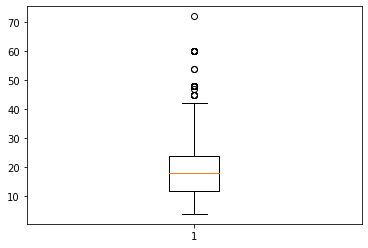

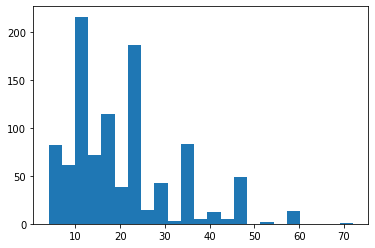

In [98]:
#Create box plots - Duration of Credit

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - Duration of Credit
duration_credit = raw_data.iloc[:, 2]
print(duration_credit)
plt.boxplot(duration_credit)
plt.show()

#Calculate bin width using Freedman–Diaconis
import numpy as np
q25, q75 = np.percentile(age, [25, 75])
width_duration_credit = 2 * (q75 - q25) * len(duration_credit) ** (-1/3)
#Calculate number of bins
from decimal import Decimal, ROUND_HALF_UP
bins_duration_credit = int(Decimal((duration_credit.max() - duration_credit.min()) / width_duration_credit).quantize(0,ROUND_HALF_UP))
#Plot Histogram
plt.hist(duration_credit, density=False, bins=bins_duration_credit)
plt.show()


0       1049.0
1       2799.0
2        841.0
3       2122.0
4       2171.0
        ...   
995     1987.0
996     2303.0
997    12680.0
998     6468.0
999     6350.0
Name: Credit Amount, Length: 1000, dtype: float64


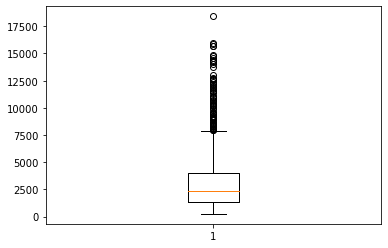

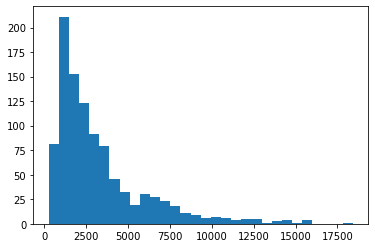

In [85]:
#Create box plots - Credit Amount

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - Credit Amount
credit_amount = raw_data.iloc[:, 5]
print(credit_amount)
plt.boxplot(credit_amount)
plt.show()

#Calculate bin width using Freedman–Diaconis
import numpy as np
q25, q75 = np.percentile(age, [25, 75])
width_credit_amount = 2 * (q75 - q25) * len(credit_amount) ** (-1/3)
#Calculate number of bins
from decimal import Decimal, ROUND_HALF_UP
bins_credit_amount = int(Decimal((credit_amount.max() - credit_amount.min()) / width_credit_amount).quantize(0,ROUND_HALF_UP))
#Plot Histogram
plt.hist(credit_amount, density=False, bins=30)
plt.show()

0      4.0
1      2.0
2      2.0
3      3.0
4      4.0
      ... 
995    2.0
996    4.0
997    4.0
998    2.0
999    4.0
Name: Instalment per cent, Length: 1000, dtype: float64


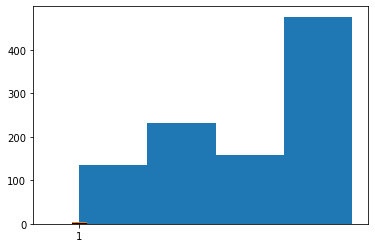

In [86]:
#Create box plots - Installment Percent

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - Installment Percent
installment_percent = raw_data.iloc[:, 8]
print(installment_percent)
plt.boxplot(installment_percent)

#Plot Histogram
plt.hist(installment_percent, density=False, bins=4)
plt.show()

0      21.0
1      36.0
2      23.0
3      39.0
4      38.0
       ... 
995    21.0
996    45.0
997    30.0
998    52.0
999    31.0
Name: Age (years), Length: 1000, dtype: float64


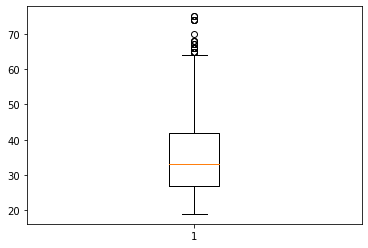

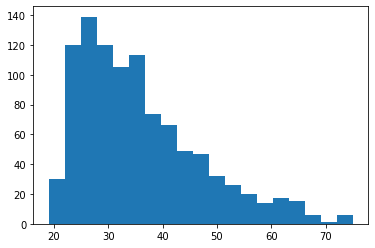

In [87]:
#Create box plots - Age

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - Installment Percent
age = raw_data.iloc[:, 13]
print(age)
plt.boxplot(age)
plt.show()

# Determine Distribution of numerical attributes by plotting histograms, for normal distributions also use Z-score to identify outliers

#Calculate bin width using Freedman–Diaconis
import numpy as np
q25, q75 = np.percentile(age, [25, 75])
width_age = 2 * (q75 - q25) * len(age) ** (-1/3)
#Calculate number of bins
from decimal import Decimal, ROUND_HALF_UP
bins_age = int(Decimal((age.max() - age.min()) / width_age).quantize(0,ROUND_HALF_UP))
#Plot Histogram
plt.hist(age, density=False, bins=bins_age)
plt.show()

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: No of Credits at this Bank, Length: 1000, dtype: float64


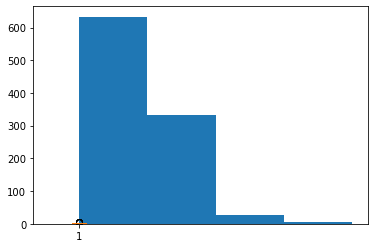

In [88]:
#Create box plots - No. of Credits

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - No. of Credits
num_credits = raw_data.iloc[:, 16]
print(num_credits)
plt.boxplot(num_credits)

# Determine Distribution of numerical attributes by plotting histograms, for normal distributions also use Z-score to identify outliers

#Plot Histogram
plt.hist(num_credits, density=False, bins=4)
plt.show()

0      1.0
1      2.0
2      1.0
3      2.0
4      1.0
      ... 
995    2.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: No of dependents, Length: 1000, dtype: float64


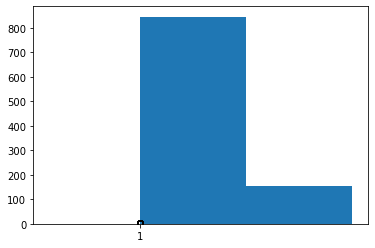

In [89]:
#Create box plots - No. of dependents

#Import modules matplotlib and numpy for plots 
import matplotlib.pyplot as plt

#Get first quantitative column - Duration of Credit
num_deps = raw_data.iloc[:, 18]
print(num_deps)
plt.boxplot(num_deps)

#Plot Histogram
plt.hist(num_deps, density=False, bins=2)
plt.show()

In [90]:
import numpy as py
corr_matrix = raw_data.corr()
print(corr_matrix)

                            Duration of Credit (month)  Credit Amount  \
Duration of Credit (month)                    1.000000       0.624988   
Credit Amount                                 0.624988       1.000000   
Instalment per cent                           0.074749      -0.271322   
Age (years)                                  -0.037550       0.032273   
No of Credits at this Bank                   -0.011284       0.020785   
No of dependents                             -0.023834       0.017144   

                            Instalment per cent  Age (years)  \
Duration of Credit (month)             0.074749    -0.037550   
Credit Amount                         -0.271322     0.032273   
Instalment per cent                    1.000000     0.057271   
Age (years)                            0.057271     1.000000   
No of Credits at this Bank             0.021669     0.150718   
No of dependents                      -0.071207     0.118589   

                            No of Credi